# Импорт библиотек

In [12]:
import os
import torch
import tarfile
import torchvision
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader

# Константы

In [38]:
TRAIN_DS_PATH = 'chest_xray_dataset/train'
VAL_DS_PATH = 'chest_xray_dataset/val'
TEST_DS_PATH = 'chest_xray_dataset/test'

BATCH_SIZE=256

In [39]:
#!conda install pytorch torchvision torchaudio cudatoolkit=11.3 -y -c pytorch
#!conda install matplotlib -y

# Аугментация данных

In [50]:
transform_train = transforms.Compose([
    transforms.Resize((512,512)), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    
])

transform_test = transforms.Compose([
    transforms.Resize((512,512)), 
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    
])

transform_example = transforms.Compose([
    transforms.Resize((512,512)), 
    transforms.ToTensor(),
    
])

# Загрузка датасета из директорий

In [51]:
train_ds = ImageFolder(TRAIN_DS_PATH, transform=transform_train)
val_ds = ImageFolder(VAL_DS_PATH, transform=transform_test)
test_ds = ImageFolder(TEST_DS_PATH, transform=transform_test)
example_ds = ImageFolder(TRAIN_DS_PATH, transform=transform_example)

Количество изображения в датасете обучения, валидации и тестовом датасете:

In [42]:
len(train_ds),len(val_ds),len(test_ds)

(5218, 625, 625)

# Задание подгрузчиков датасета

In [45]:
#!lscpu

In [46]:
num_workers = 16

In [48]:
train_dl = DataLoader(train_ds, BATCH_SIZE, shuffle=True, num_workers=num_workers, pin_memory=True)
val_dl = DataLoader(val_ds, BATCH_SIZE, num_workers=num_workers, pin_memory=True)
test_dl = DataLoader(test_ds, BATCH_SIZE, num_workers=num_workers, pin_memory=True)

# Пример изображений 

images.shape: torch.Size([256, 3, 512, 512])


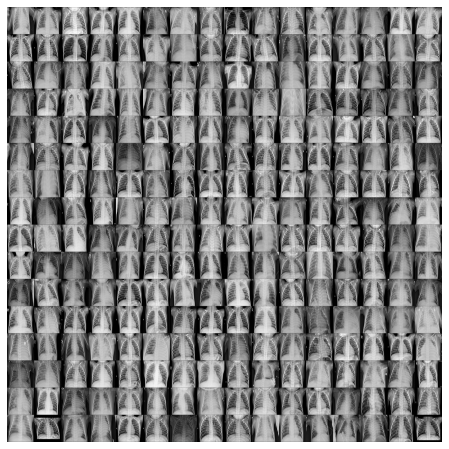

In [52]:
example_dl = DataLoader(example_ds, BATCH_SIZE, shuffle=True, num_workers=num_workers, pin_memory=True)


for images, _ in example_dl:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break



In [54]:
import pathlib
root = pathlib.Path(TEST_DS_PATH)
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])
classes

['bac', 'norm', 'vir']

# Метрики

In [55]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

# Инициализация модели

In [ ]:
from torchvision import models 
modelvgg = models.vgg19(pretrained = True)